#DIVE INTO THE BEEHIVE

##INSTRUCTIONS 
In this lesson you started looking at a dataset around bees and their honey production over a period of time that saw losses in the bee colony population overall. Dig deeper into this dataset and build a notebook that can tell the story of the health of the bee population, state by state and year by year. Do you discover anything interesting about this dataset?

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
honey_df=pd.read_csv('honey.csv')
honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
honey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.3+ KB


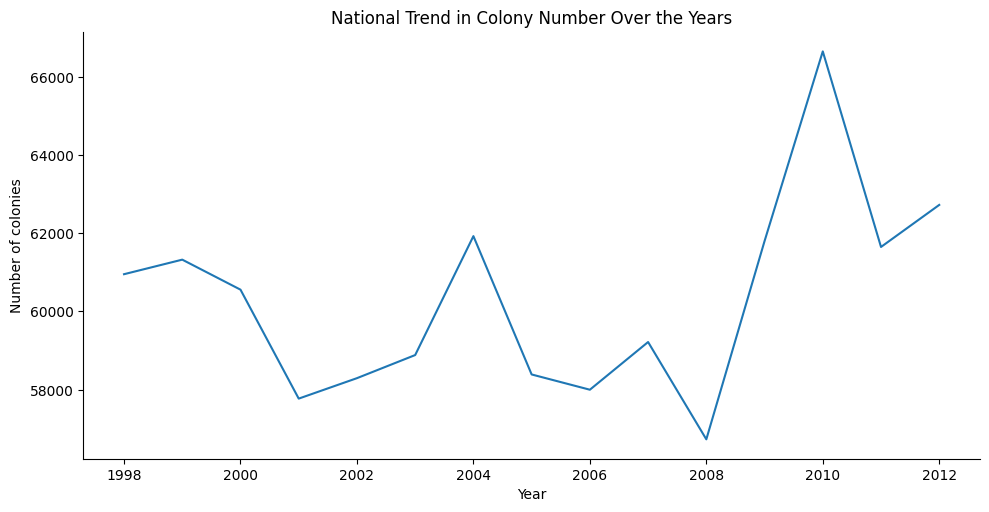

In [6]:
import seaborn as sns
sns.relplot(x='year', y='numcol',data=honey_df, kind='line',errorbar=None,height=5,aspect=2)

plt.title('National Trend in Colony Number Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of colonies')
plt.show()

The charts shows that the number of bee colonies in the United States has generally declined over the years. There are some fluctuations, but the overall trend is downward, indicating a decrease during the period covered.

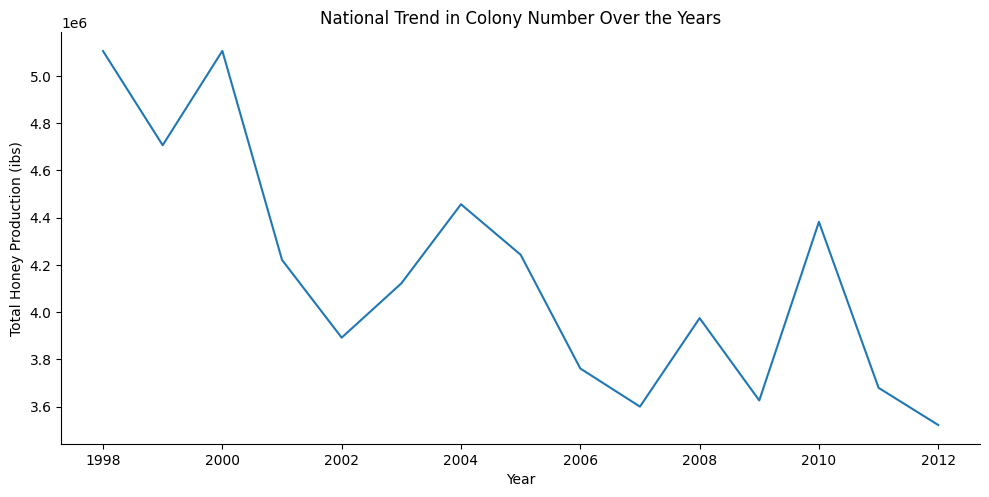

In [7]:
sns.relplot(x='year', y='totalprod',data=honey_df, kind='line',errorbar=None,height=5,aspect=2)

plt.title('National Trend in Colony Number Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Honey Production (ibs)')
plt.show()

The charts shows that total honey production in the states has generally declined over time ,with some fluctuations.


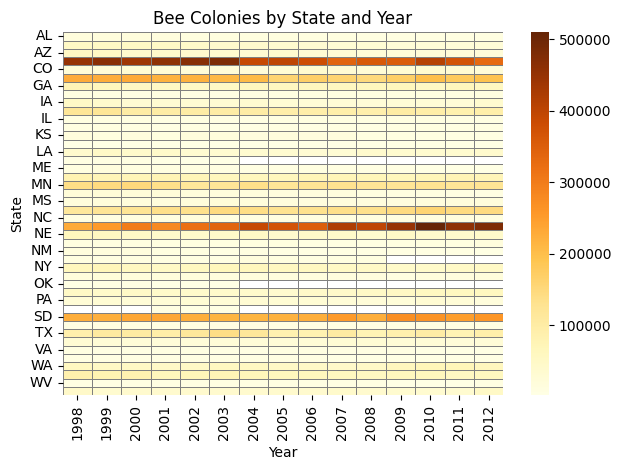

In [8]:
pivot_table=honey_df.pivot_table(index='state', columns='year', values='numcol', aggfunc='sum')
sns.heatmap(pivot_table, cmap='YlOrBr', linewidths=0.5, linecolor='gray')

plt.title('Bee Colonies by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()

Darker shades indicates the higher colony numbers, while ligher shades shows fewer colonies:
1. From the visualization, Strong states (constantly high colony numbers): CA,ND,SD,FL,MT and MN.
2. From the visualization, Weak states (constantly Low colony numbers): MD,KY,SC,VT and WV.

C:\Users\Win11\AppData\Local\Temp\ipykernel_8440\240272755.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  honey_df.groupby('year', group_keys=False).apply(lambda x:x.nlargest(5,'totalprod')).reset_index(drop=True)


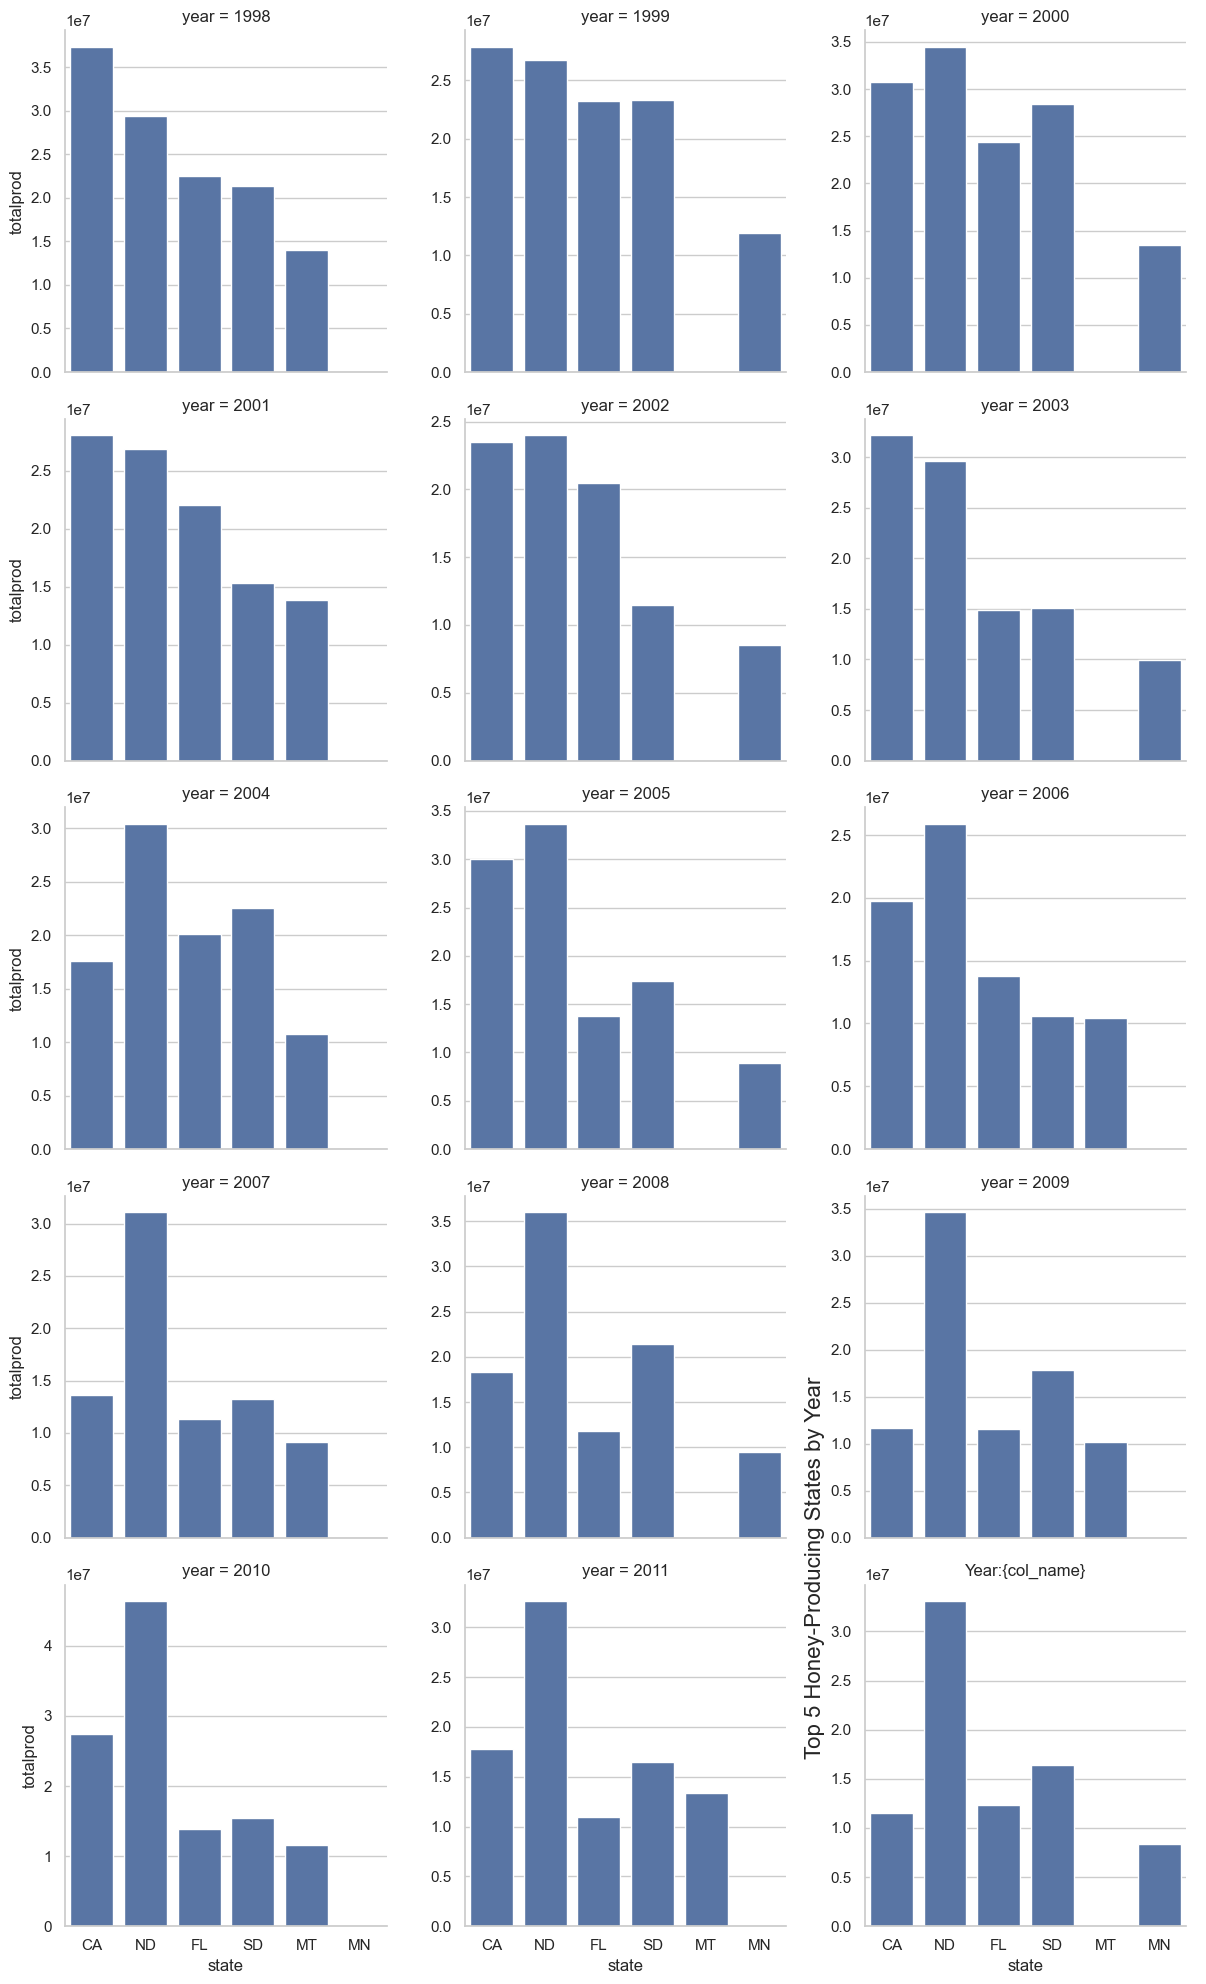

In [10]:
top_states_per_year=(
    honey_df.groupby('year', group_keys=False).apply(lambda x:x.nlargest(5,'totalprod')).reset_index(drop=True)
)

sns.set(style='whitegrid')
g=sns.catplot(data=top_states_per_year, kind='bar', x='state', y='totalprod',col='year', col_wrap=3, height=4, sharey=False)

plt.title('Year:{col_name}')
plt.ylabel('Top 5 Honey-Producing States by Year', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

We can see that certain states , such as North Dakota(ND),South Dakota(SD),California(CA), and Florida(FD), consistently appear among the top producers across the years. This highlights their significant role in national honey production. Additionally, the rea=lative production amounts and rankings can shift year to year , reflecting changes in local conditions. 